In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-motor-temperature/measures_v2.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Set style
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/electric-motor-temperature/measures_v2.csv')
print("First 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)

First 5 rows:


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17



Dataset shape: (1330816, 13)


In [4]:
print("Data Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB

Statistical Summary:


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [5]:
print("Missing values per column:")
print(df.isnull().sum())
# No missing values – good!

Missing values per column:
u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


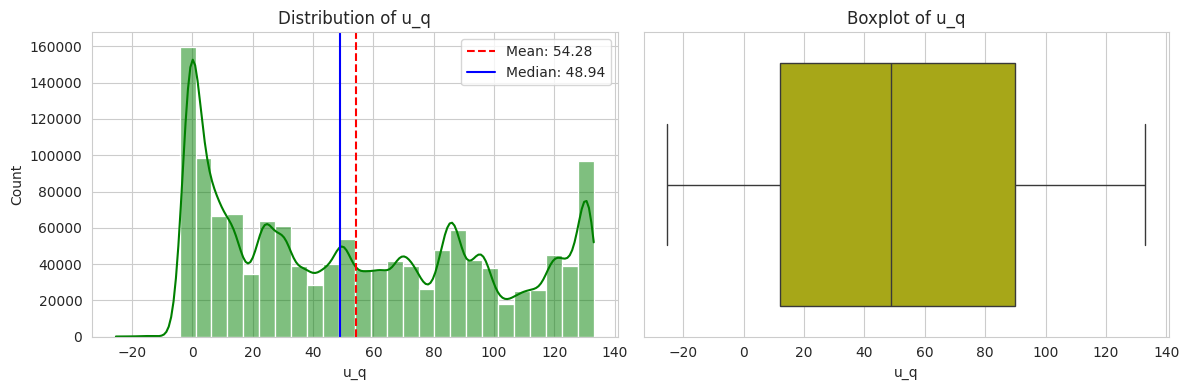

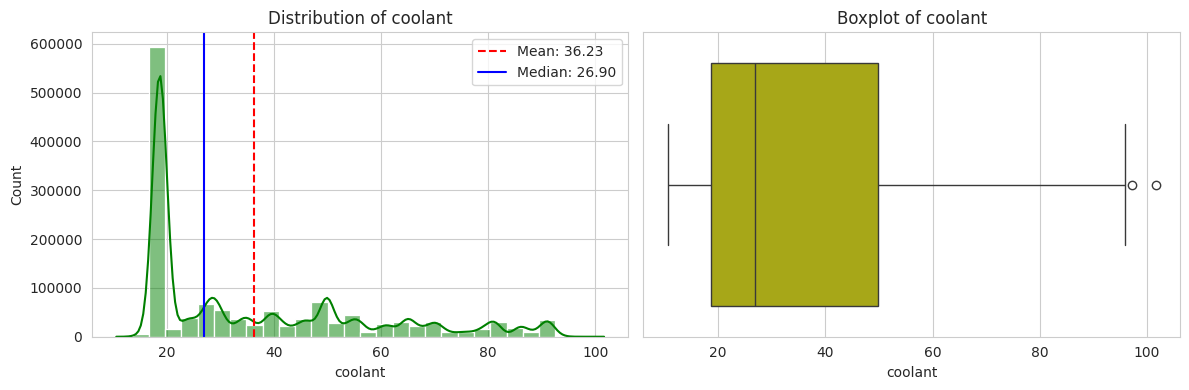

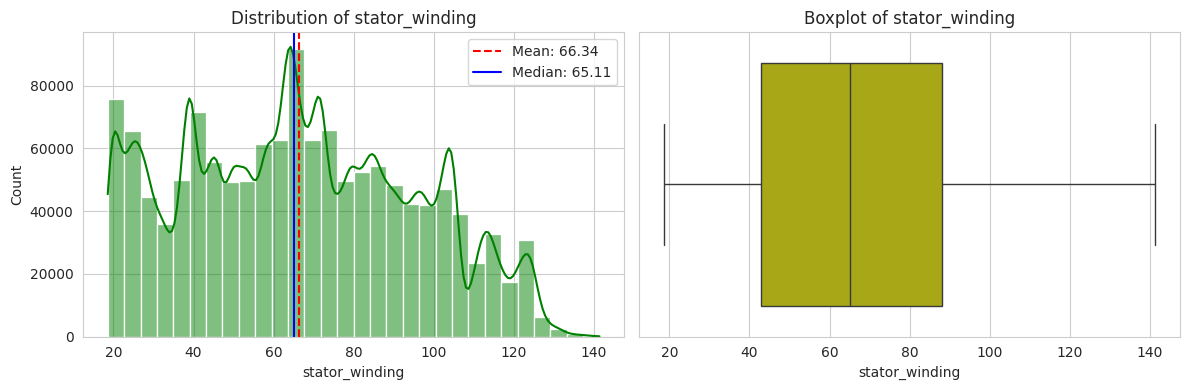

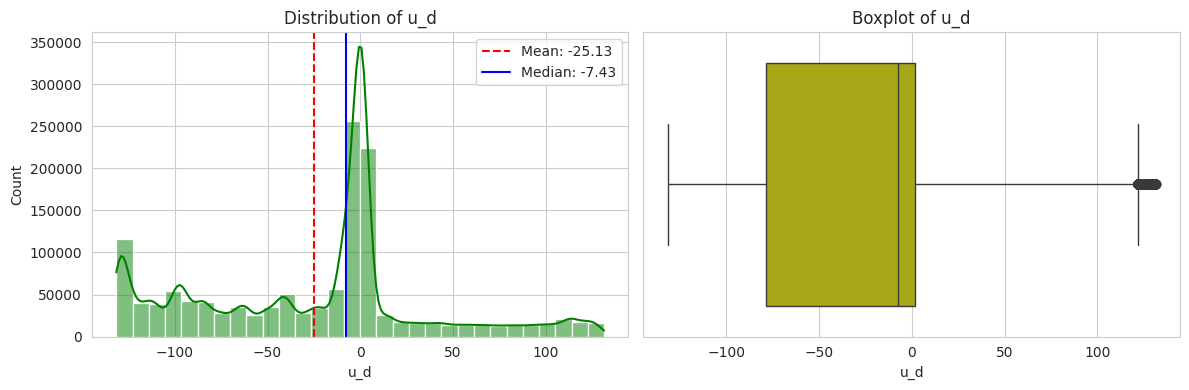

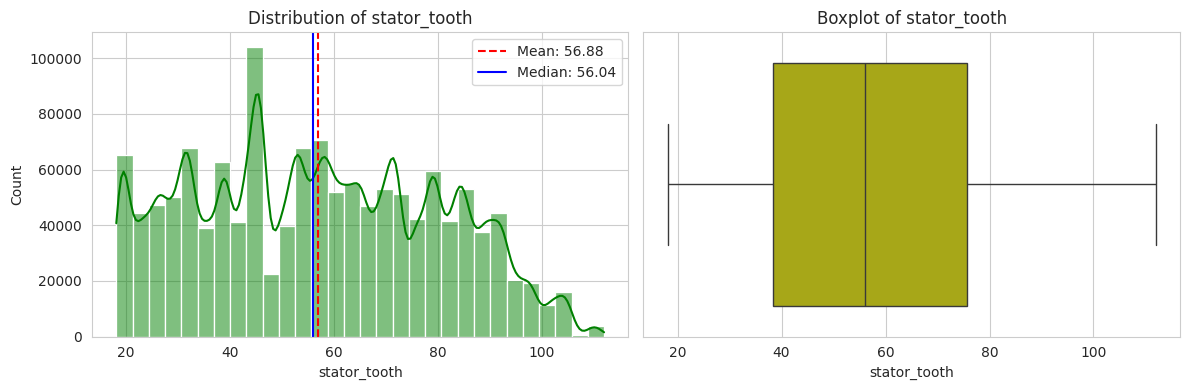

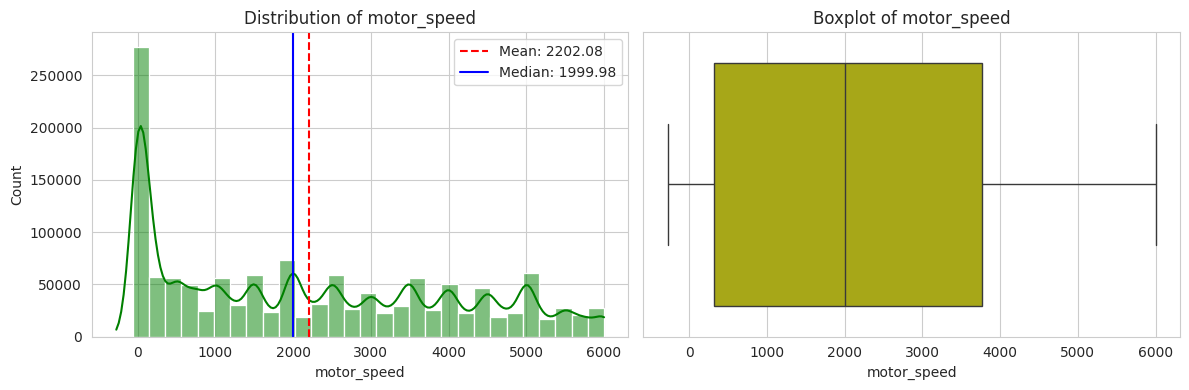

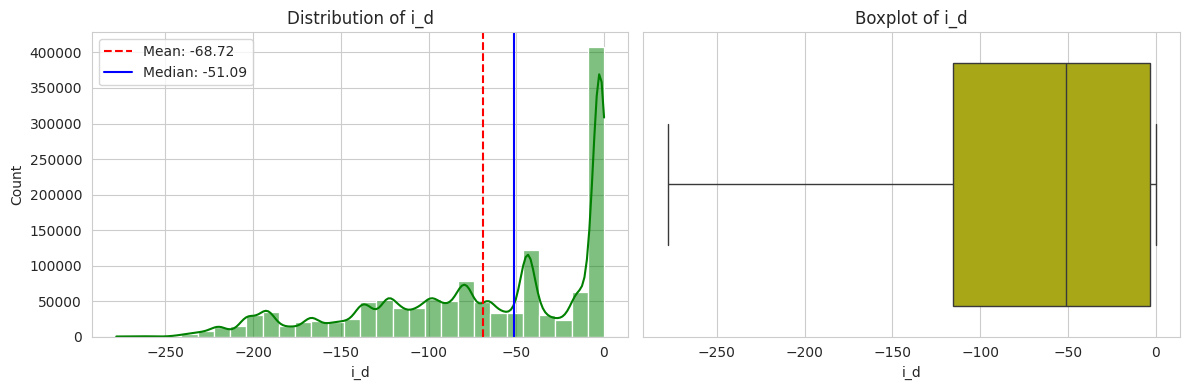

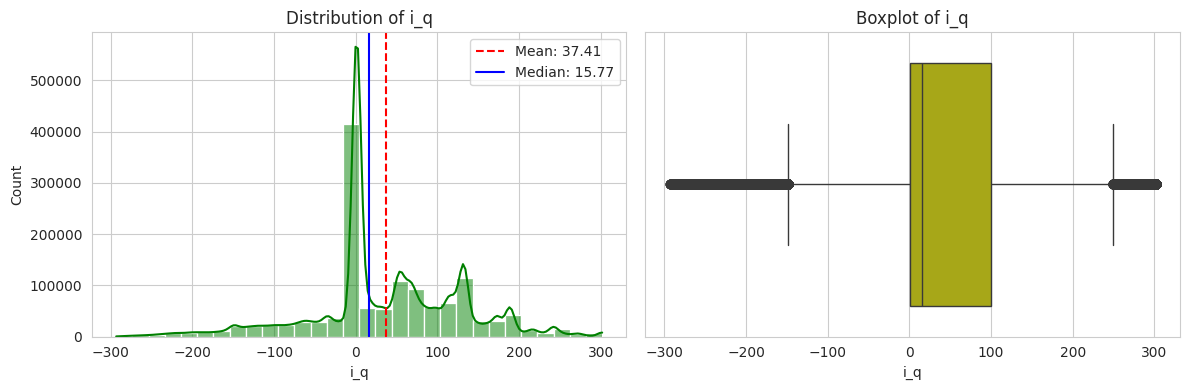

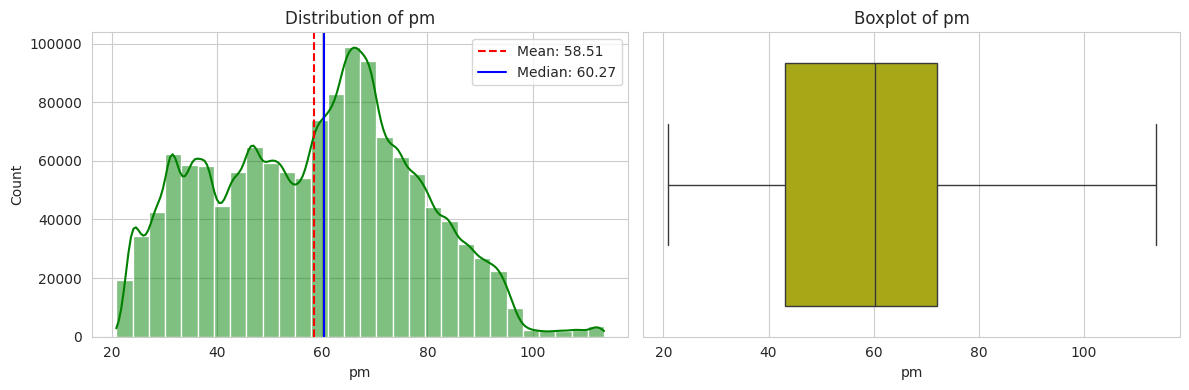

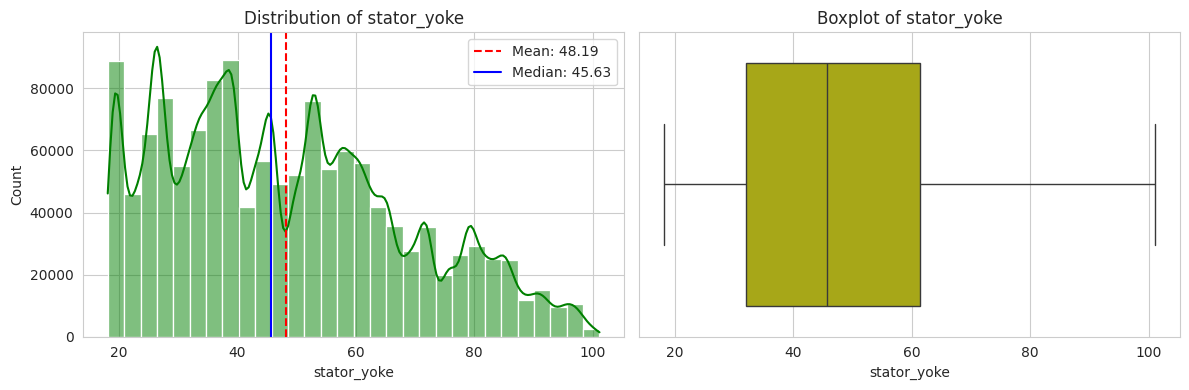

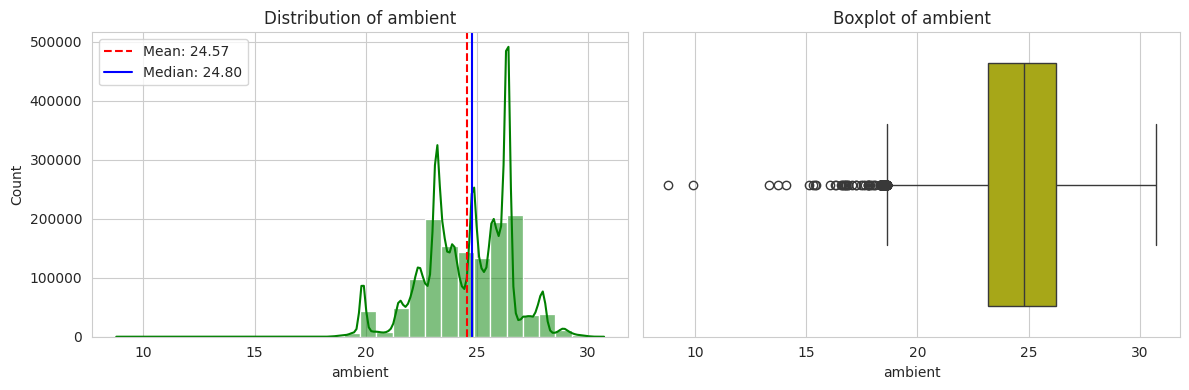

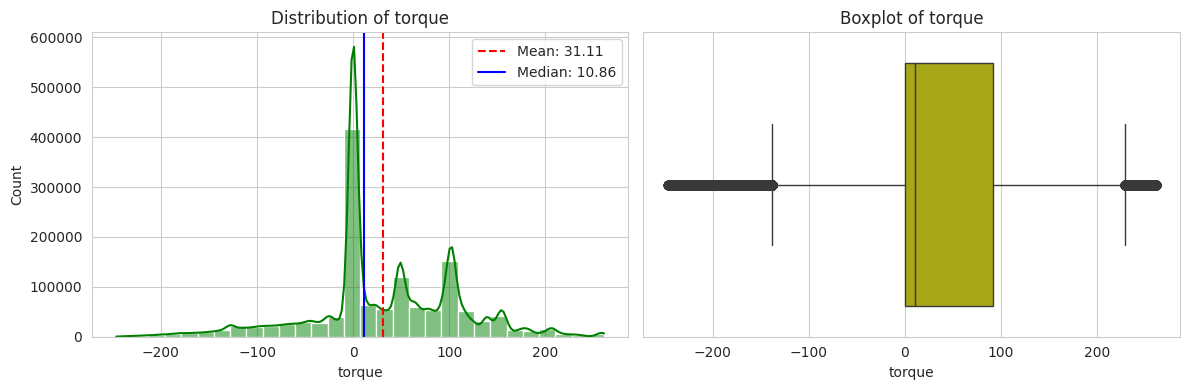

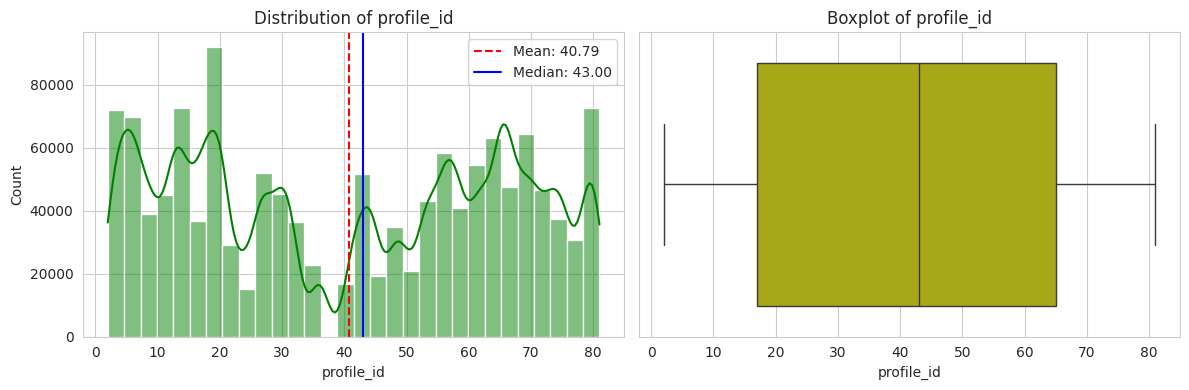

In [6]:
for col in df.columns:
    plt.figure(figsize=(12, 4))
    
    # Distribution plot (histogram + KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='g', bins=30)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='b', linestyle='-', label=f'Median: {df[col].median():.2f}')
    plt.title(f'Distribution of {col}')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='y')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

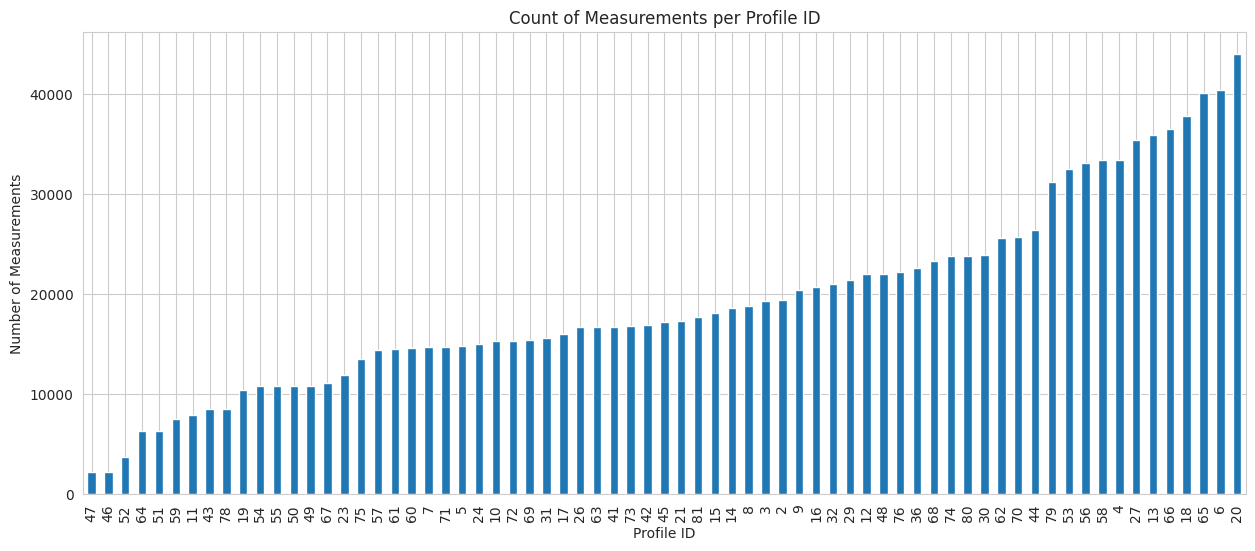

In [7]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')
plt.title('Count of Measurements per Profile ID')
plt.xlabel('Profile ID')
plt.ylabel('Number of Measurements')
plt.show()

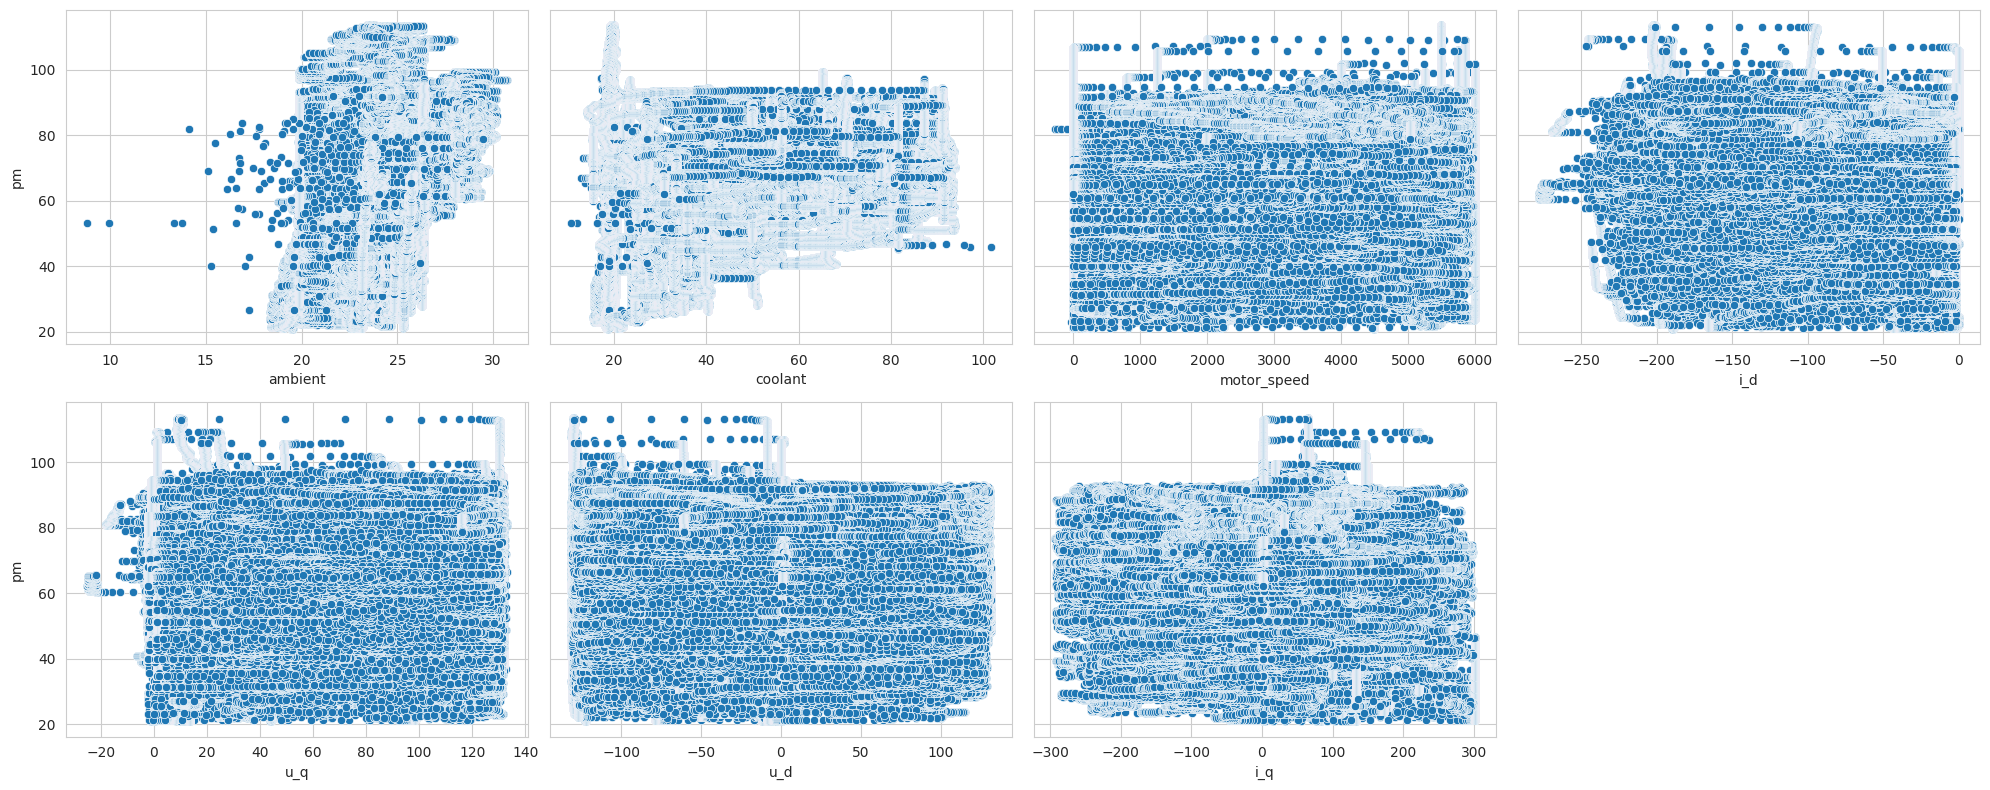

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8), sharey=True)
sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0,0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0,1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0,2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0,3])
sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1,0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1,1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1,2])
# Hide empty subplot (8th)
axes[1,3].set_visible(False)

plt.tight_layout()
plt.show()

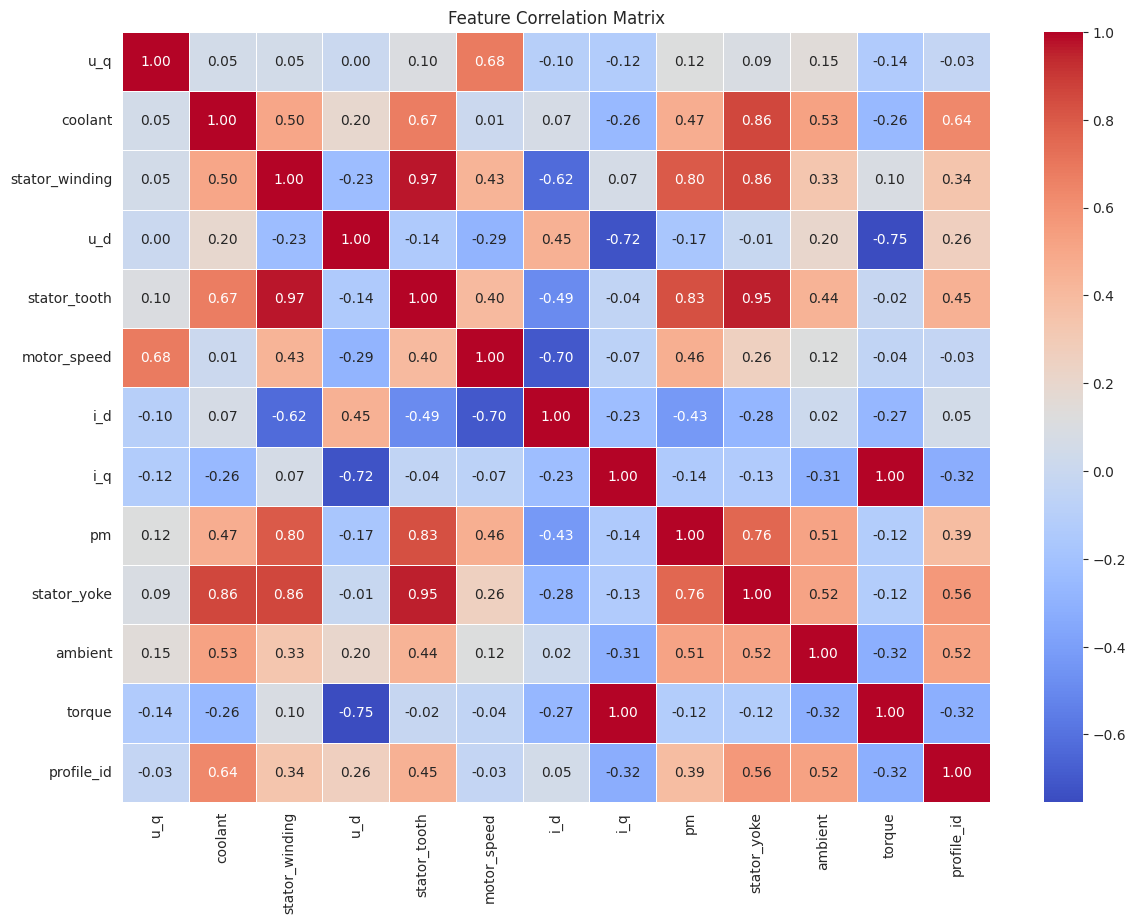

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

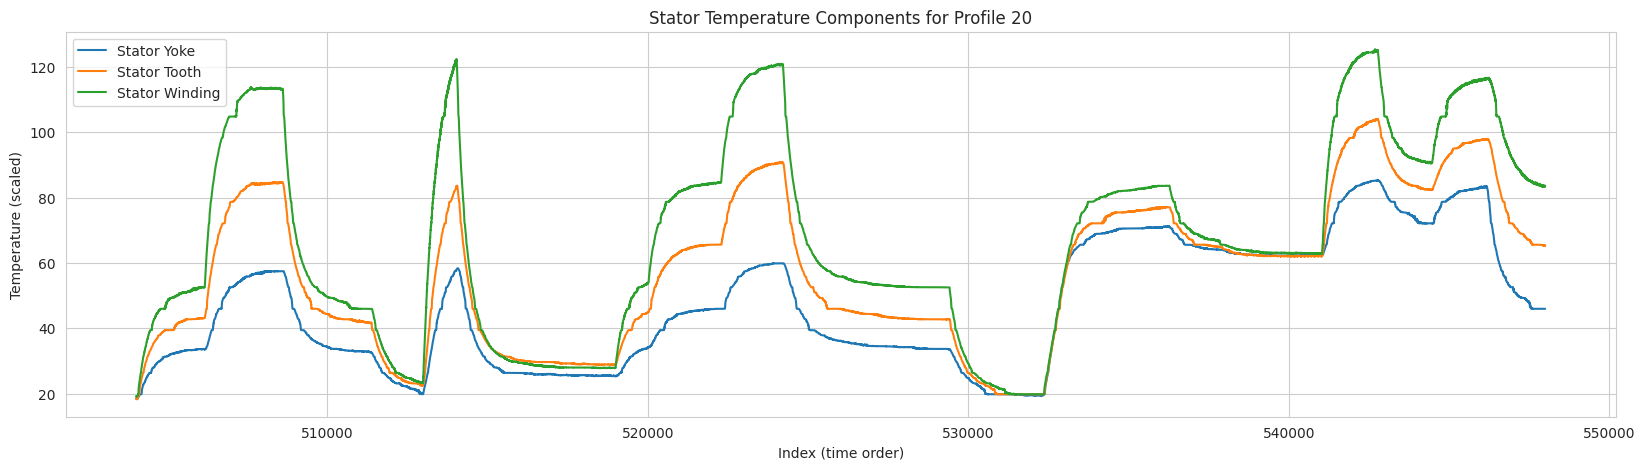

In [10]:
profiles = df['profile_id'].unique()
if 20 in profiles:
    pid = 20
else:
    pid = profiles[0]  # fallback to first profile

plt.figure(figsize=(20,5))
df[df['profile_id'] == pid]['stator_yoke'].plot(label='Stator Yoke')
df[df['profile_id'] == pid]['stator_tooth'].plot(label='Stator Tooth')
df[df['profile_id'] == pid]['stator_winding'].plot(label='Stator Winding')
plt.xlabel('Index (time order)')
plt.ylabel('Temperature (scaled)')
plt.title(f'Stator Temperature Components for Profile {pid}')
plt.legend()
plt.show()

In [11]:
cols_to_drop = ['stator_yoke', 'stator_tooth', 'stator_winding', 'torque', 'profile_id']
# Only drop columns that actually exist
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)

print("Columns remaining after dropping:")
print(df.columns.tolist())

Columns remaining after dropping:
['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'pm', 'ambient']


In [12]:
X = df.drop('pm', axis=1)   # all remaining columns except target
y = df['pm']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1330816, 7)
Target shape: (1330816,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3, shuffle=True
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (931571, 7)
Test set size: (399245, 7)


In [14]:
scaler = MinMaxScaler()

# Fit on training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames to keep column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Reset indices of target variables (for alignment, if needed)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Feature scaling completed.")

Feature scaling completed.


In [15]:
joblib.dump(scaler, 'transform.save')
print("Scaler saved as 'transform.save'")

Scaler saved as 'transform.save'


In [16]:
print("First 5 rows of scaled training features:")
display(X_train.head())

First 5 rows of scaled training features:


,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient
0,0.342170,0.088986,0.013418,0.760970,0.310294,0.633053,0.574584
1,0.686870,0.778962,0.662474,0.359290,0.956548,0.389044,0.802574
2,0.658435,0.089420,0.352995,0.314000,0.951057,0.600828,0.618860
3,0.771523,0.085478,0.497238,0.362602,0.992626,0.494870,0.659283
4,0.163304,0.276719,0.510422,0.043907,0.992616,0.494871,0.802532


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import joblib

In [25]:
lr = LinearRegression()                     # Linear Regression
dr = DecisionTreeRegressor(random_state=42) # Decision Tree
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1) # Random Forest (50 trees for speed)

# SVM – we'll train on a subset of training data (20,000 samples) due to dataset size
sample_size = 20000
from sklearn.model_selection import train_test_split
X_train_svm, _, y_train_svm, _ = train_test_split(
    X_train, y_train, train_size=sample_size, random_state=42
)
svm = SVR(kernel='linear')  # linear kernel for faster training

In [26]:
lr.fit(X_train, y_train)

# Train Decision Tree
dr.fit(X_train, y_train)

# Train Random Forest
rf.fit(X_train, y_train)

# Train SVM on the subset
svm.fit(X_train_svm, y_train_svm)

print("✅ All models trained successfully.")

✅ All models trained successfully.


In [27]:
p1 = lr.predict(X_test)   # Linear Regression predictions
p2 = dr.predict(X_test)   # Decision Tree predictions
p3 = rf.predict(X_test)   # Random Forest predictions
p4 = svm.predict(X_test)  # SVM predictions


In [28]:
print("\n📈 R² Scores:")
print("Linear Regression R²   :", r2_score(y_test, p1))
print("Decision Tree R²       :", r2_score(y_test, p2))
print("Random Forest R²       :", r2_score(y_test, p3))
print("SVM R²                 :", r2_score(y_test, p4))


📈 R² Scores:
Linear Regression R²   : 0.6013579842765244
Decision Tree R²       : 0.9828175451372309
Random Forest R²       : 0.9916584195904511
SVM R²                 : 0.5964517818639882


In [29]:
print("\n📉 RMSE:")
print("Linear Regression RMSE :", np.sqrt(mean_squared_error(y_test, p1)))
print("Decision Tree RMSE     :", np.sqrt(mean_squared_error(y_test, p2)))
print("Random Forest RMSE     :", np.sqrt(mean_squared_error(y_test, p3)))
print("SVM RMSE               :", np.sqrt(mean_squared_error(y_test, p4)))



📉 RMSE:
Linear Regression RMSE : 11.98046913550168
Decision Tree RMSE     : 2.4872812466081773
Random Forest RMSE     : 1.7330315128659797
SVM RMSE               : 12.05396723323157


In [31]:
joblib.dump(rf, 'model.save')
print("\n💾 Best model (Decision Tree) saved as 'model.save'")


💾 Best model (Decision Tree) saved as 'model.save'
